# 15.Regression 회귀 분석

## 설정

### 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-chache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 + 데이터 전처리

In [4]:
df = pd.read_csv('./data/12_2.NeutralFat.csv', encoding = 'cp949')
df.head()

,col,fat
0,108.4,44.1
1,110.4,40.9
2,127.1,44.3
3,128.2,50.5
4,131.7,77.3


In [5]:
# 행, 열 개수 세기

df.shape

(60, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     60 non-null     float64
 1   fat     60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
col,60.0,169.25,25.91,108.4,149.60,168.7,185.68,229.4
fat,60.0,105.53,50.59,40.9,64.53,98.8,137.85,228.2


## Regression

In [9]:
column = ['col'] #독립변수

formula = "fat ~ " + "+".join(column)
formula

'fat ~ col'

In [10]:
from patsy import dmatrices

y, x = dmatrices(formula,
                 data = df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

In [11]:
model = sm.OLS(y, x) # 회귀 모델 생성

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     43.50
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           1.40e-08
Time:                        15:40:01   Log-Likelihood:                -303.27
No. Observations:                  60   AIC:                             610.5
Df Residuals:                      58   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.8193     33.178     -3.340      0.0

omnibus, jb는 정규성 검정. 둘 다 0.05 이상으로 귀무가설 채택. 정규성 만족

Cond. No. --> VIF

## 등분산성 검정

In [ ]:
# 잔차의 등분산성 검정 : breush-Pagan

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange Multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange Multiplier statistic01.Python 기초 사용법.ipynb',
  np.float64(3.051708475917816)),
 ('p-value', np.float64(0.0806522593331768)),
 ('f-value', np.float64(3.1080667543535414)),
 ('f p-value', np.float64(0.08317323757773469))]

In [13]:
# 잔차 플롯

# 표준화 잔차 생성

influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict()

# 데이터 프레임 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df.head()

,pred,res_standard
0,27.747121,0.449443
1,30.303697,0.290245
2,51.651101,-0.196734
3,53.057218,-0.068353
4,57.531225,0.526471


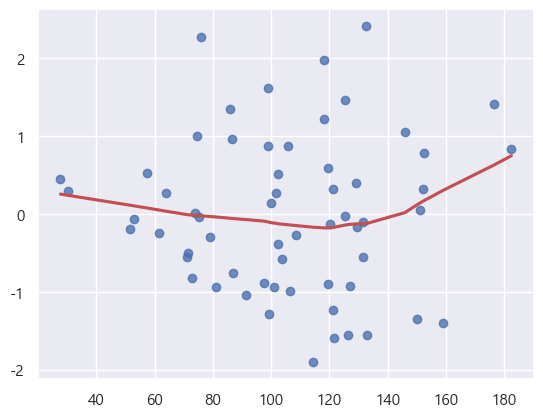

In [14]:
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color = 'r'),
            data = regplot_df)

plt.show()

## 정규성 검정

In [15]:
# shapiro test

pg.normality(result.resid)

,W,pval,normal
0,0.9828,0.557663,True


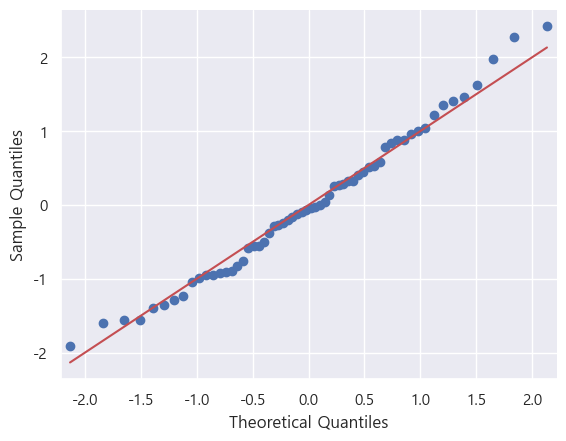

In [16]:
# QQ plot

sm.qqplot(res_standard, line = 's')
sns.despine()

In [17]:
# 표준화 잔차를 이용한 이상치 확인

stud_res = result.outlier_test()

stud_res.sort_values(by = 'student_resid', ascending = False).head()

,student_resid,unadj_p,bonf(p)
50,2.526612,0.014318,0.859059
13,2.365622,0.021424,1.000000
35,2.031057,0.046922,1.000000
21,1.649461,0.104554,1.000000
43,1.475345,0.145623,1.000000


In [18]:
# 회귀 차트



In [19]:
## 다중 공선성

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i ) for i in range(x.values.shape[1])]
vif['features'] = x.columns

print(vif.round(1))

   VIF Factor   features
0        44.4  Intercept
1         1.0        col


# 댜중 회귀



## 다중회귀



In [20]:
# 데이터

df = pd.read_csv('./data/12_1.MR(pred).csv', encoding = 'cp949')
df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,150750,7388,5,6,1959,2002,1063,624,1327,0,1,1,1
1,2,131500,4435,6,5,2003,2003,848,420,848,0,3,2,2
2,3,160000,8800,6,6,1964,1964,1251,461,1251,0,1,1,1
3,4,187500,13031,6,5,1995,1996,691,409,691,807,1,1,1
4,5,153900,7892,6,5,1993,1993,1199,530,1199,0,3,2,2


In [21]:
# 범주형 변수 처리

df['주거유형'].replace({1:'단독주택', 2:'튜플렉스', 3:'기타'}, inplace = True)
df['주거유형'] = df['주거유형'].astype('category')

df['판매유형'].replace({1:'보증증서', 2:'신규건물'}, inplace = True)
df['판매유형'] = df['판매유형'].astype('category')

df['판매조건'].replace({1:'정상판매', 2:'압류(공매도)'}, inplace = True)
df['판매조건'] = df['판매조건'].astype('category')

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21084\2333503568.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['주거유형'].replace({1:'단독주택', 2:'튜플렉스', 3:'기타'}, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_21084\2333503568.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,150750,7388,5,6,1959,2002,1063,624,1327,0,단독주택,보증증서,정상판매
1,2,131500,4435,6,5,2003,2003,848,420,848,0,기타,신규건물,압류(공매도)
2,3,160000,8800,6,6,1964,1964,1251,461,1251,0,단독주택,보증증서,정상판매
3,4,187500,13031,6,5,1995,1996,691,409,691,807,단독주택,보증증서,정상판매
4,5,153900,7892,6,5,1993,1993,1199,530,1199,0,기타,신규건물,압류(공매도)


In [22]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,121.0,61.000,35.074,1.0,31.0,61.0,91.0,121.0
가격,121.0,160050.653,24553.521,97000.0,144000.0,163000.0,175000.0,228000.0
연면적,121.0,8829.157,3040.173,1533.0,7200.0,9247.0,10800.0,16635.0
품질,121.0,5.901,0.723,4.0,5.0,6.0,6.0,8.0
상태,121.0,5.975,1.084,3.0,5.0,6.0,7.0,8.0
건축년도,121.0,1963.603,26.390,1890.0,1957.0,1968.0,1978.0,2009.0
리모델링년도,121.0,1982.570,18.394,1950.0,1968.0,1988.0,2000.0,2009.0
지하면적,121.0,967.207,315.738,0.0,731.0,912.0,1196.0,1844.0
차고면적,121.0,445.248,159.853,0.0,336.0,453.0,530.0,923.0
면적_1층,121.0,1119.347,317.726,483.0,848.0,1116.0,1350.0,2020.0


In [23]:
df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

In [25]:
column = ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'] #독립변수

formula = "가격 ~ " + " + ".join(column)
formula

'가격 ~ 연면적 + 품질 + 상태 + 건축년도 + 리모델링년도 + 지하면적 + 차고면적 + 면적_1층 + 면적_2층 + 주거유형 + 판매유형 + 판매조건'

In [29]:
y, X = dmatrices(formula,
                 data = df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

In [30]:
model = sm.OLS(y, X)
result = model.fit()

In [32]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     39.88
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           5.29e-35
Time:                        15:50:32   Log-Likelihood:                -1287.5
No. Observations:                 121   AIC:                             2603.
Df Residuals:                     107   BIC:                             2642.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -1.19e+05   1.46e+05     -0.815   

### P>|t|

- 1,2,3,4번 영향 없음.
- 5,6 번째 영향 있음

## 기본 검정

### 등분산성 검정

In [33]:
name = ["Lagrange Multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange Multiplier statistic', np.float64(26.816819635700025)),
 ('p-value', np.float64(0.01317952593592602)),
 ('f-value', np.float64(2.3435506538519126)),
 ('f p-value', np.float64(0.008644022000006196))]

- 등분산성 아님. 귀무가설 기각

In [34]:
# 잔차 플롯

# 표준화 잔차 생성

influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict()

# 데이터 프레임 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df.head()

,pred,res_standard
0,145982.124889,0.467629
1,134423.133237,-0.287447
2,159480.148533,0.049094
3,192100.694563,-0.450222
4,158254.343480,-0.433046


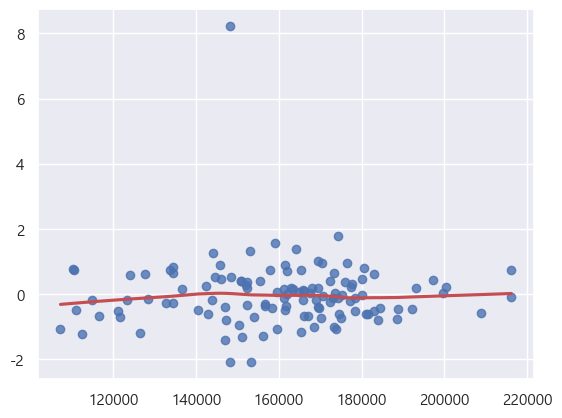

In [36]:
# 잔차 플롯

sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color = 'r'),
            data = regplot_df)

plt.show()

In [37]:
# shapiro test

pg.normality(result.resid)

,W,pval,normal
0,0.726994,1.054872e-13,False


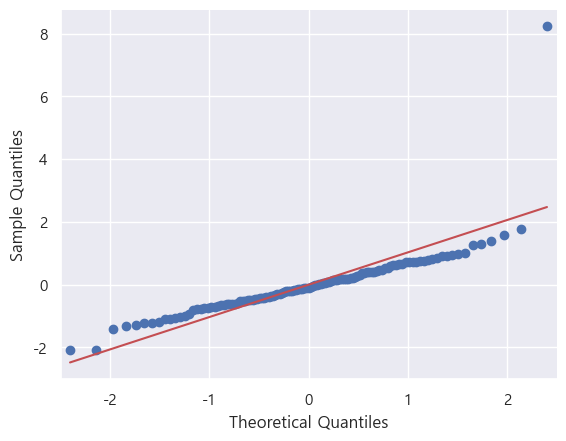

In [38]:
# QQ plot

sm.qqplot(res_standard, line = 's')
sns.despine()

In [39]:
# 이상치 제거

# 표준화 잔차를 이용한 이상치 확인

stud_res = result.outlier_test()

stud_res.sort_values(by = 'student_resid', ascending = False).head()

,student_resid,unadj_p,bonf(p)
120,13.504098,8.913759e-25,1.078565e-22
100,1.782336,7.755752e-02,1.000000e+00
106,1.590713,1.146522e-01,1.000000e+00
112,1.400458,1.642965e-01,1.000000e+00
76,1.312467,1.921972e-01,1.000000e+00


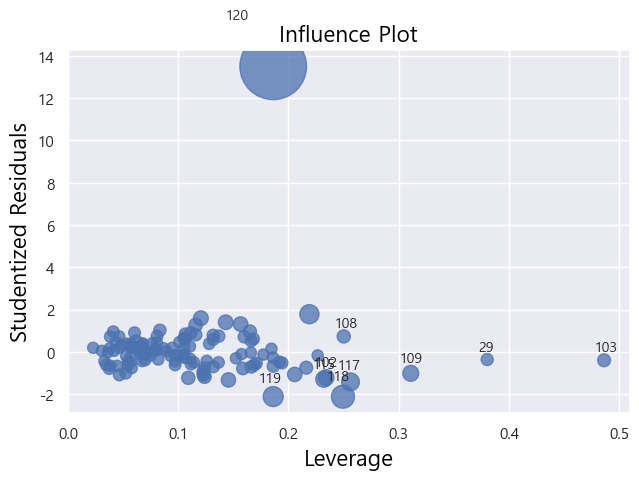

In [42]:
# cook distance를 이용한 이상치 확인

fig = sm.graphics.influence_plot(result, criterion = 'cooks')

plt.rc('font', size = 7)
fig.tight_layout(pad = 1.0)
plt.show()

In [50]:
# 이상치 제거

mr_df = df.drop(120)

### 이상치 제거 후 다시 분석

In [51]:
y, X = dmatrices(formula,
                 data = mr_df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

In [52]:
model = sm.OLS(y, X)
result = model.fit()

In [53]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     113.2
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           7.19e-56
Time:                        16:05:35   Log-Likelihood:                -1217.3
No. Observations:                 120   AIC:                             2463.
Df Residuals:                     106   BIC:                             2502.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -1.1e+05    8.9e+04     -1.237   

In [54]:
name = ["Lagrange Multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange Multiplier statistic', np.float64(30.92792057034943)),
 ('p-value', np.float64(0.0034543898778725754)),
 ('f-value', np.float64(2.8312071280223883)),
 ('f p-value', np.float64(0.0016049705966912802))]

In [55]:
# 잔차 플롯

# 표준화 잔차 생성

influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict()

# 데이터 프레임 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df.head()

,pred,res_standard
0,147478.139094,0.526886
1,133109.374144,-0.259834
2,160059.415525,-0.009212
3,190618.073191,-0.500995
4,158715.476782,-0.786201


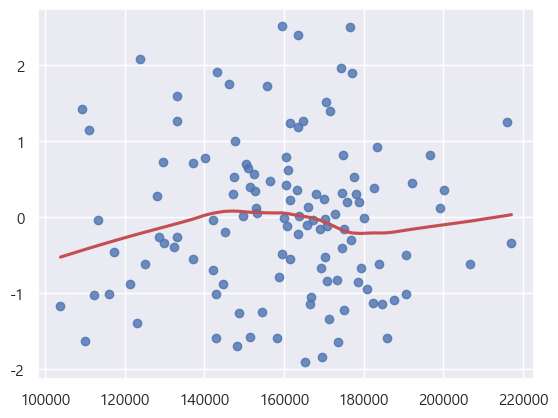

In [56]:
# 잔차 플롯

sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color = 'r'),
            data = regplot_df)

plt.show()

In [58]:
# shapiro test

pg.normality(result.resid)

,W,pval,normal
0,0.979869,0.069245,True


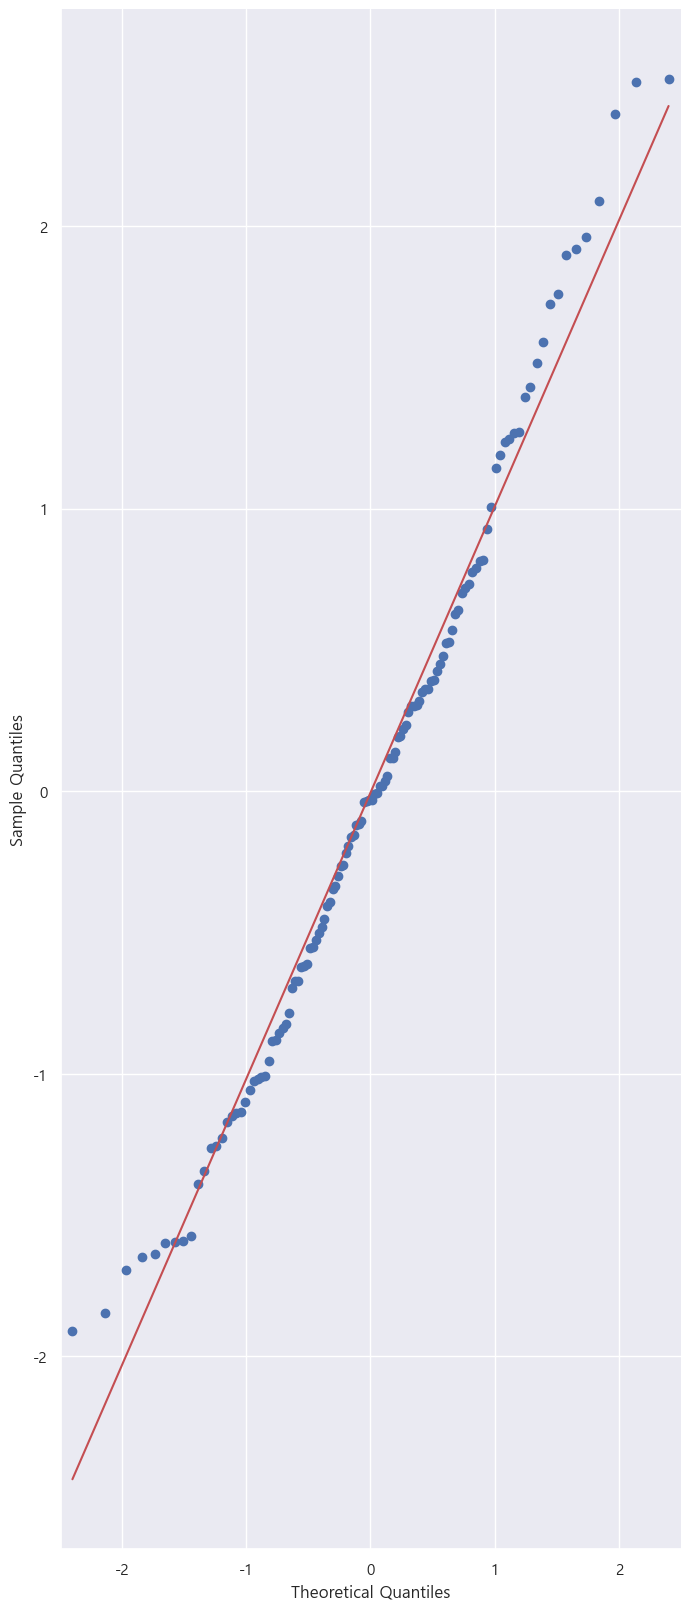

In [59]:
# QQ plot

sm.qqplot(res_standard, line = 's')
sns.despine()

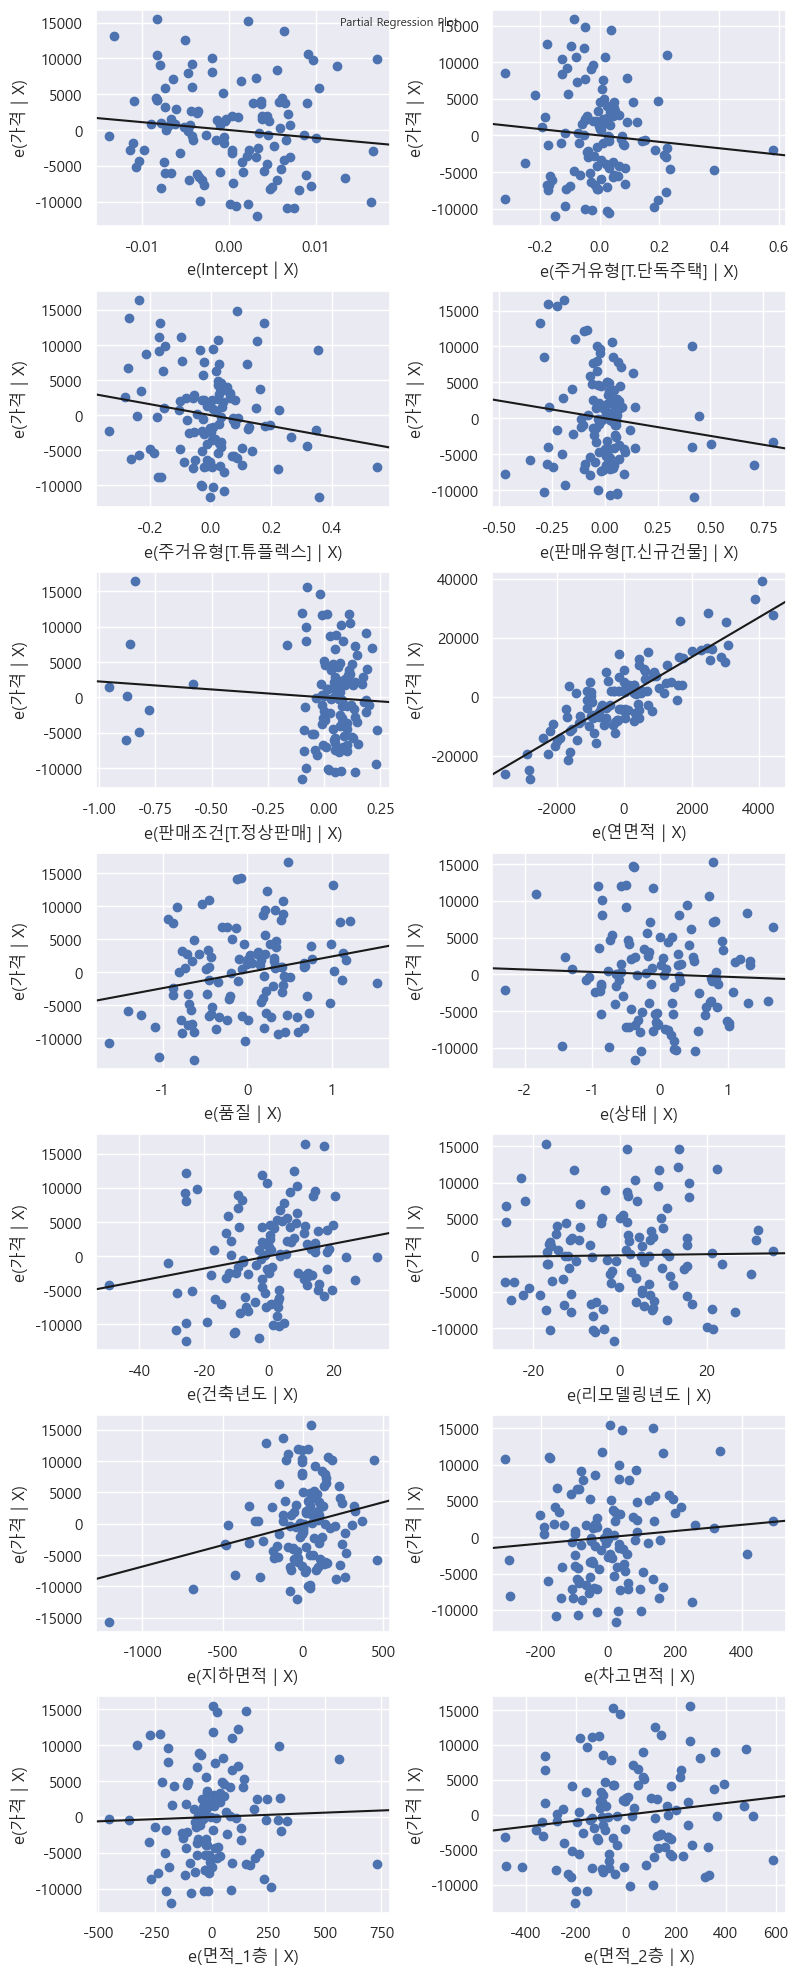

In [ ]:
# 독립변수들마다의 회귀 도표

plt.rc('figure', figsize = (8,20))
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout()

### 다중공선성 확인



In [61]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i ) for i in range(X.values.shape[1])]
vif['features'] = X.columns

print(vif.round(1))

    VIF Factor      features
0      22128.9     Intercept
1         11.8  주거유형[T.단독주택]
2          5.7  주거유형[T.튜플렉스]
3          4.7  판매유형[T.신규건물]
4          3.9  판매조건[T.정상판매]
5          4.1           연면적
6          1.4            품질
7          2.2            상태
8          3.6          건축년도
9          1.7        리모델링년도
10         2.1          지하면적
11         1.4          차고면적
12         3.5         면적_1층
13         3.1         면적_2층


주거유형[T.단독주택]은 다중공손성이 10 이상이므로 제거하고 분석하는 것이 정론